## Data Exploration with the Hillenbrand database


+ Author: Dirk Van Compernolle   
+ History:   
    - 2020: Created
    - 25/04/2022: upgrade to pyspch>=0.6
+ Requires:
    - pyspch>=0.7

In [ ]:
# uncomment the pip install command to install pyspch -- it is required!
#
#!pip install git+https://github.com/compi1234/pyspch.git
#
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [1]:
# Importing some core Python libraries for data handling and plotting's baseline machine learning stack 
#
%matplotlib inline
import sys,os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import pyspch.core as Spch
from pyspch.core.hillenbrand import fetch_hillenbrand, select_hillenbrand

np.set_printoptions(precision=2)
mpl.rcParams['figure.figsize'] = [8.0, 8.0]
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'

## 1. The Hillenbrand Database 

see the notebook on the VowelTriangle for more info on the database

In [4]:
hildata = fetch_hillenbrand(genders='adults').dropna()
all_vowels = np.unique(hildata['vowel'])
all_genders = np.unique(hildata['gender'])
all_features = ["f0","F1","F2","F3"]
print(all_vowels)
print(all_genders)
print(all_features)
#
hildata

['ae' 'ah' 'aw' 'eh' 'ei' 'er' 'ih' 'iy' 'oa' 'oo' 'uh' 'uw']
['m' 'w']
['f0', 'F1', 'F2', 'F3']


,gender,vowel,f0,F1,F2,F3
fid,,,,,,
m01ae,m,ae,174.0,663.0,2012.0,2659.0
m02ae,m,ae,102.0,628.0,1871.0,2477.0
m03ae,m,ae,99.0,605.0,1812.0,2570.0
m04ae,m,ae,124.0,627.0,1910.0,2488.0
m06ae,m,ae,115.0,647.0,1864.0,2561.0
...,...,...,...,...,...,...
w46uw,w,uw,166.0,362.0,1351.0,2879.0
w47uw,w,uw,238.0,482.0,987.0,2781.0
w48uw,w,uw,234.0,458.0,1163.0,2651.0


## 2. Histograms for 1D data  - Example: Pitch

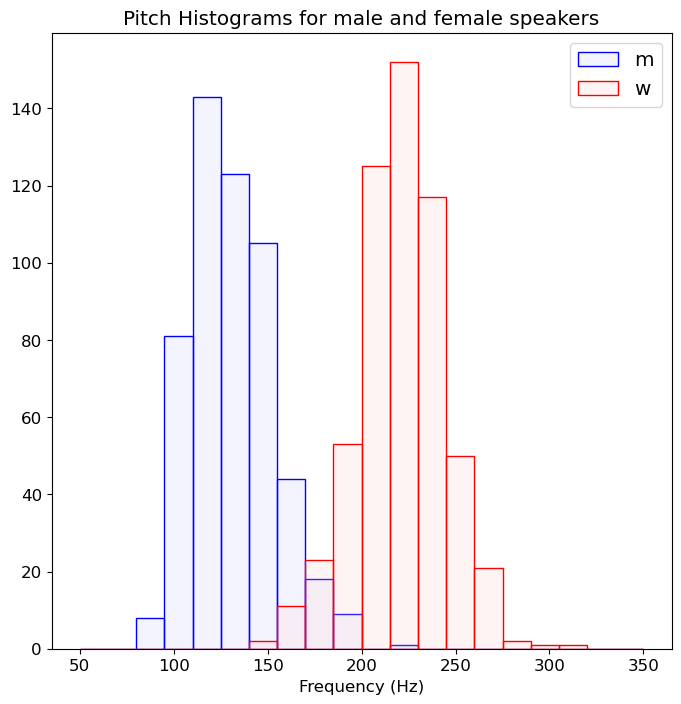

In [ ]:
# plot histograms of the data
Xmale = hildata.loc[hildata['gender']=='m','f0']
Xfemale = hildata.loc[hildata['gender']=='w','f0']
#fig,ax = plt.subplots(1,2,figsize=(10,10))
plt.figure()
plt.hist(Xmale,range=[50.,350.],bins=20,ec='b',fc=(.8,.8,1,.2))
plt.hist(Xfemale,range=[50.,350.],bins=20,ec='r',fc=(1,.8,.8,.2))
plt.xlabel('Frequency (Hz)')
plt.legend(['m','w'])
plt.title('Pitch Histograms for male and female speakers');